# **Unstructured Data Processing**

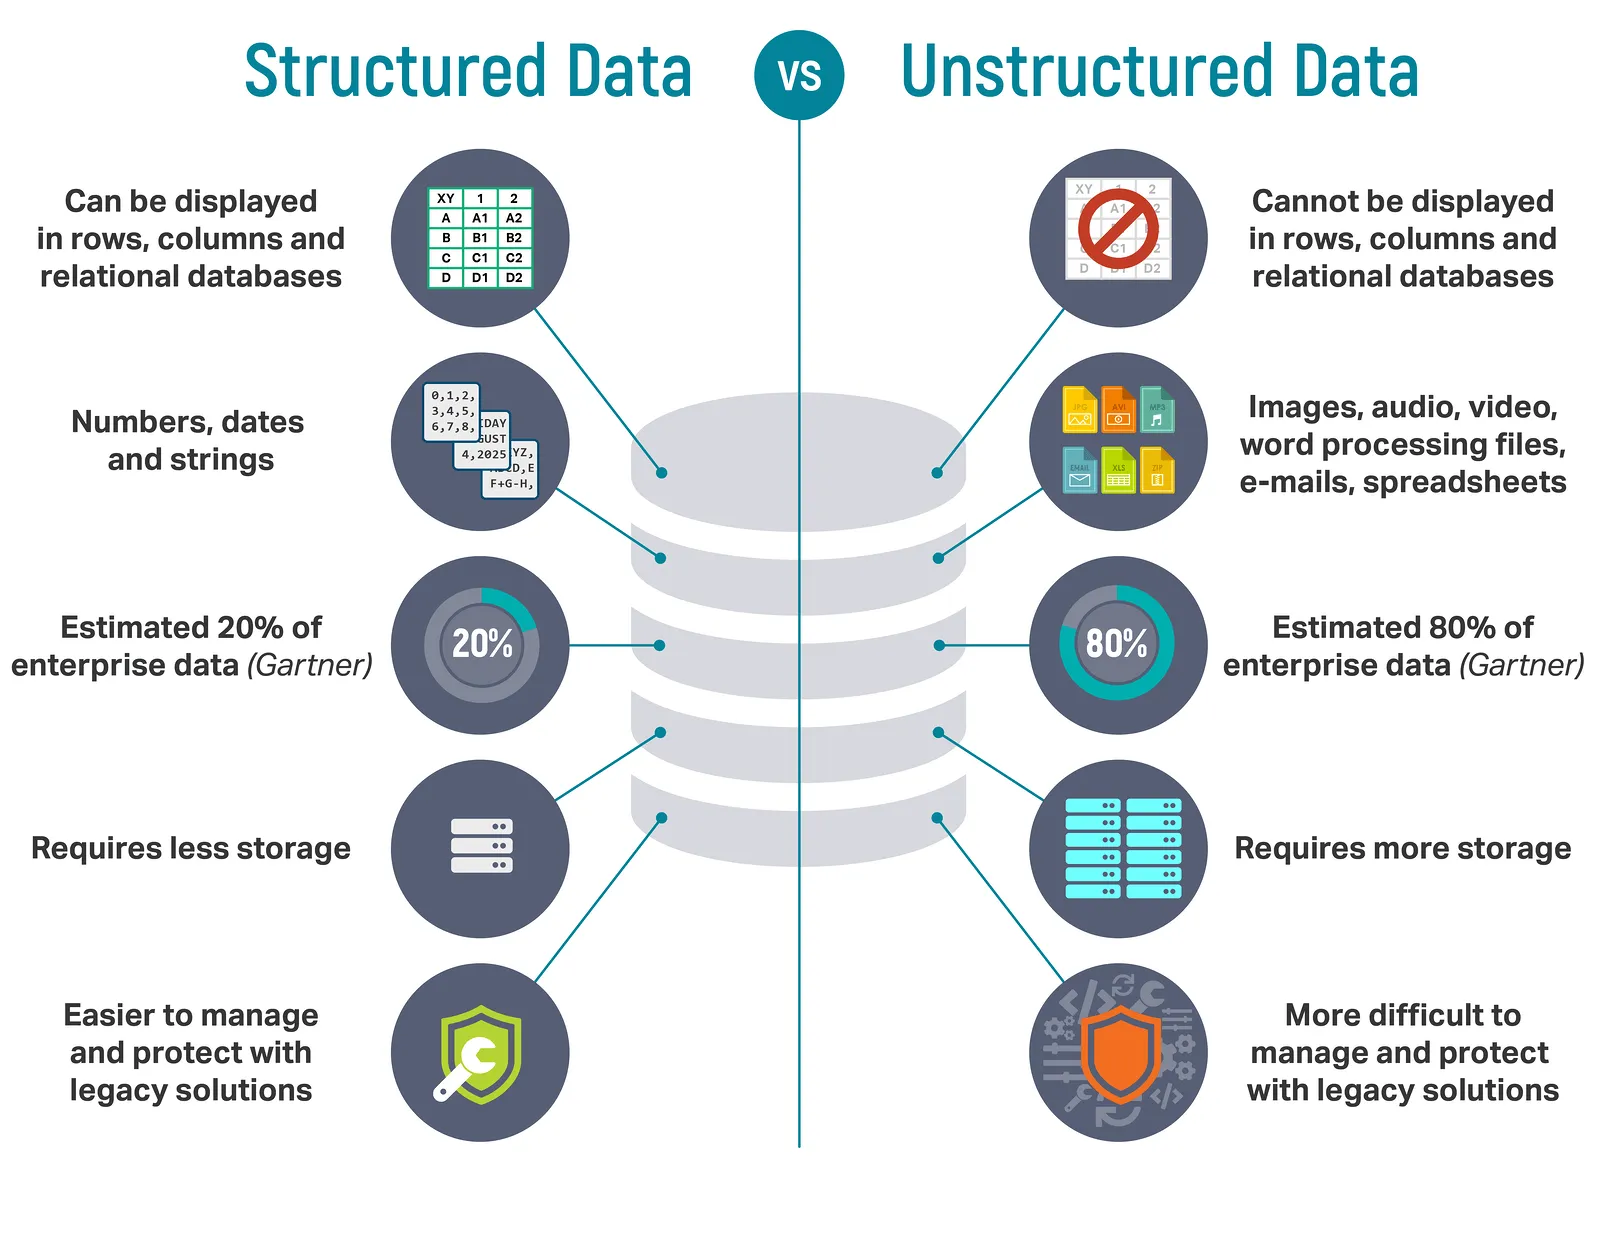

# In this notebook, we'll explore several essential natural language processing (NLP) tasks:
#
# - **Regular Expressions:** Useful for pattern matching and text manipulation.
# - **Tokenization:** Splitting text into words or tokens.
# - **Removing Stop Words:** Eliminating common words that don't add much meaning.
# - **Stemming and Lemmatization:** Converting words to their root/base forms.
# - **Text Representation:** Converting text data into numerical features (using Bag-of-Words and TF-IDF).

### 1. What is a Digital Image?

##  1.Regular Expressions


In [15]:
import re

# Example text
text = "The price is 100 dollars and 50 cents. Call me at 123-456-7890."

# Find all numbers
numbers = re.findall(r'\d+', text)
print("Numbers found:", numbers)

# Split the text on punctuation (., !, ?)
sentences = re.split(r'[.!?]\s*', text)
print("Sentences:", [s for s in sentences if s])  # filter out empty strings


date_text = "The event is on 12/05/2023 and the registration deadline is 10-04-2023."
# Regex with groups: day, month, year
date_pattern = r'(\d{2})[/-](\d{2})[/-](\d{4})'

# Function to rearrange the date into ISO format (YYYY-MM-DD)
def standardize_date(match):
    day, month, year = match.groups()
    return f"{year}-{month}-{day}"

standardized_text = re.sub(date_pattern, standardize_date, date_text)
print("Standardized Dates:", standardized_text)


Numbers found: ['100', '50', '123', '456', '7890']
Sentences: ['The price is 100 dollars and 50 cents', 'Call me at 123-456-7890']
Standardized Dates: The event is on 2023-05-12 and the registration deadline is 2023-04-10.


## 2.Tokenization

In [16]:
import nltk
# Uncomment if running for the first time:
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

sample_text = "Hello there! How are you doing today? NLP is both fun and challenging."
tokens = word_tokenize(sample_text)
print("NLTK Tokens:", tokens)

# Using regex to split on non-word characters
custom_tokens = re.findall(r'\b\w+\b', sample_text)
print("Custom Regex Tokens:", custom_tokens)



NLTK Tokens: ['Hello', 'there', '!', 'How', 'are', 'you', 'doing', 'today', '?', 'NLP', 'is', 'both', 'fun', 'and', 'challenging', '.']
Custom Regex Tokens: ['Hello', 'there', 'How', 'are', 'you', 'doing', 'today', 'NLP', 'is', 'both', 'fun', 'and', 'challenging']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [17]:

from nltk.tokenize import sent_tokenize

paragraph = "Hello there! How are you doing today? NLP is fun. Let's explore more."
sentences = sent_tokenize(paragraph)
print("Sentences:", sentences)

Sentences: ['Hello there!', 'How are you doing today?', 'NLP is fun.', "Let's explore more."]


## 3.Removing Stop Words


In [18]:
from nltk.corpus import stopwords
# Uncomment if running for the first time:
nltk.download('stopwords')

# Standard stop words from NLTK
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print("Tokens after removing NLTK Stop Words:", filtered_tokens)

Tokens after removing NLTK Stop Words: ['Hello', '!', 'today', '?', 'NLP', 'fun', 'challenging', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
custom_stop_words = set(['NLP', 'fun'])  # adding domain-specific stop words
combined_stop_words = stop_words.union(custom_stop_words)
filtered_tokens_custom = [word for word in tokens if word.lower() not in combined_stop_words]
print("Tokens after removing custom Stop Words:", filtered_tokens_custom)

Tokens after removing custom Stop Words: ['Hello', '!', 'today', '?', 'NLP', 'challenging', '.']


## 4.Stemming  and  Lemmatization


In [20]:
# %%
from nltk.stem import PorterStemmer, WordNetLemmatizer
# Uncomment if running for the first time:
nltk.download('wordnet')

ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

words = ["running", "runs", "ran", "easily", "fairly", "better", "studies", "studying"]
stemmed_words = [ps.stem(word) for word in words]
lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]  # Using 'v' for verbs where applicable

print("Original Words:", words)
print("Stemmed Words:", stemmed_words)
print("Lemmatized Words (as verbs):", lemmatized_words)

Original Words: ['running', 'runs', 'ran', 'easily', 'fairly', 'better', 'studies', 'studying']
Stemmed Words: ['run', 'run', 'ran', 'easili', 'fairli', 'better', 'studi', 'studi']
Lemmatized Words (as verbs): ['run', 'run', 'run', 'easily', 'fairly', 'better', 'study', 'study']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 5.Text Representation


In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# Bag-of-Words representation (default: unigrams)
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(corpus)
print("Bag-of-Words Feature Names (Unigrams):", vectorizer.get_feature_names_out())
print("Bag-of-Words Representation (Unigrams):\n", bow.toarray())









Bag-of-Words Feature Names (Unigrams): ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
Bag-of-Words Representation (Unigrams):
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [22]:
# Bag-of-Words with n-grams (unigrams and bigrams)
vectorizer_ngram = CountVectorizer(ngram_range=(1, 2))
bow_ngram = vectorizer_ngram.fit_transform(corpus)
print("\nBag-of-Words Feature Names (Unigrams and Bigrams):", vectorizer_ngram.get_feature_names_out())
print("Bag-of-Words Representation (n-grams):\n", bow_ngram.toarray())


Bag-of-Words Feature Names (Unigrams and Bigrams): ['and' 'and this' 'document' 'document is' 'first' 'first document' 'is'
 'is the' 'is this' 'one' 'second' 'second document' 'the' 'the first'
 'the second' 'the third' 'third' 'third one' 'this' 'this document'
 'this is' 'this the']
Bag-of-Words Representation (n-grams):
 [[0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 2 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0]
 [1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0]
 [0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1]]


In [23]:
# %% [markdown]
# ### 5.2. TF-IDF Representation
#
# TF-IDF weights words according to their frequency in a document relative to the entire corpus.

# %%
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus)
print("\nTF-IDF Feature Names:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Representation:\n", tfidf.toarray())


TF-IDF Feature Names: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
TF-IDF Representation:
 [[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


In [26]:

import matplotlib.pyplot as plt
import numpy as np

# Sum the counts for each word
word_counts = bow.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

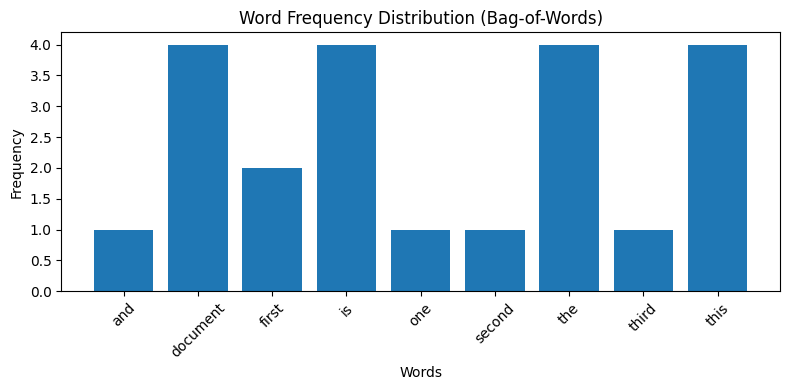

In [25]:
# Plotting
plt.figure(figsize=(8, 4))
plt.bar(np.arange(len(words)), word_counts, align='center')
plt.xticks(np.arange(len(words)), words, rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Bag-of-Words)")
plt.tight_layout()
plt.show()

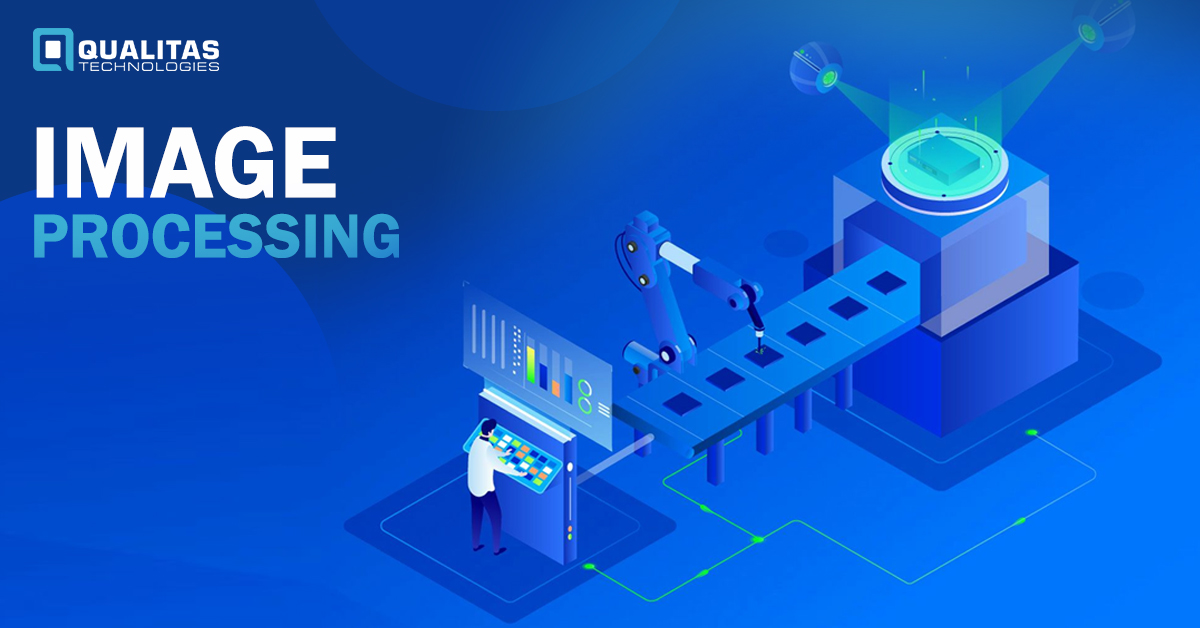



# In this notebook, we dive deep into image processing with numerous examples. We cover:

## 1. **What is a Digital Image?**
##    - Explore the structure of digital images.
##    - Create synthetic grayscale and color images.

## 2. **Basic Image Operations**
##    - Loading images from different sources.
##    - Converting color spaces, resizing, cropping, and rotating.

# 3. **Convolution 2D (Conv2D)**
##    - Apply various kernels (smoothing, sharpening, edge detection).
##    - Compare custom convolution results.

# 4. **Edge Detection**
##    - Use multiple edge detection methods (Canny, Sobel, Laplacian).

# 5. **Image Segmentation**
##    - Apply simple thresholding (Otsu and adaptive).
##    - Explore segmentation with K-means clustering.

## This notebook uses libraries such as OpenCV, scikit-image, NumPy, SciPy, and Matplotlib.

# 1. Load and Inspect the Input Image

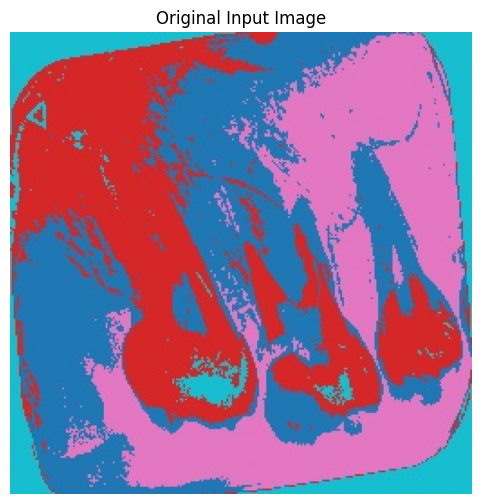

Image shape: (256, 256, 3)
Image data type: uint8


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Change 'input_image.jpg' to your image file path if needed.
input_image_path = '/content/(Questionable) 15-16-17_fuzzy.jpg'
img = cv2.imread(input_image_path)

if img is None:
    raise FileNotFoundError(f"Could not load '{input_image_path}'. Make sure the file exists in the directory.")

# Convert the image from BGR (OpenCV default) to RGB for display.
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Original Input Image")
plt.axis("off")
plt.show()

# Print image properties
print("Image shape:", img.shape)
print("Image data type:", img.dtype)


# 2. Basic Image Operations

### 2.1. Convert to Grayscal

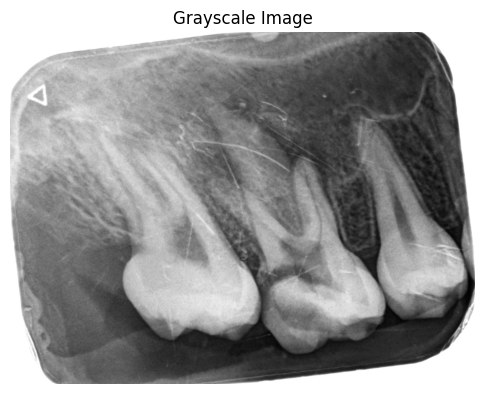

In [28]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

### 2.2. Resize the Image

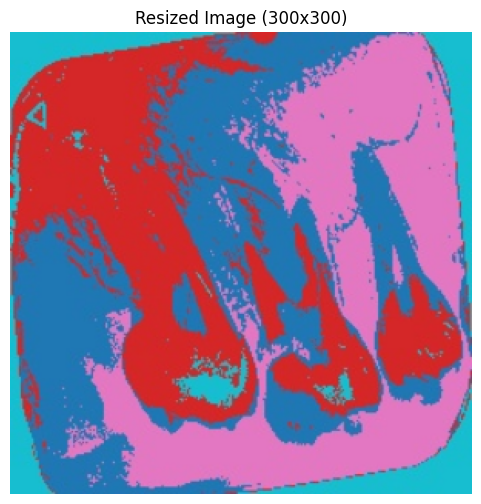

In [30]:
img_resized = cv2.resize(img, (300, 300))
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.title("Resized Image (300x300)")
plt.axis("off")
plt.show()

### 2.3. Crop the Image

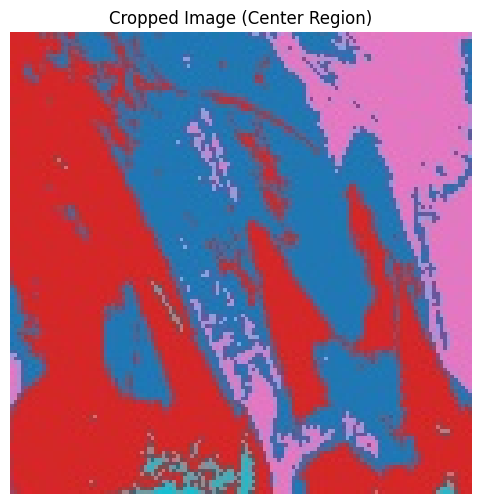

In [31]:
h, w, _ = img.shape
start_row, start_col = h // 4, w // 4
end_row, end_col = start_row + h // 2, start_col + w // 2
img_cropped = img[start_row:end_row, start_col:end_col]
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img_cropped, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image (Center Region)")
plt.axis("off")
plt.show()

### 2.4. Rotate the Image

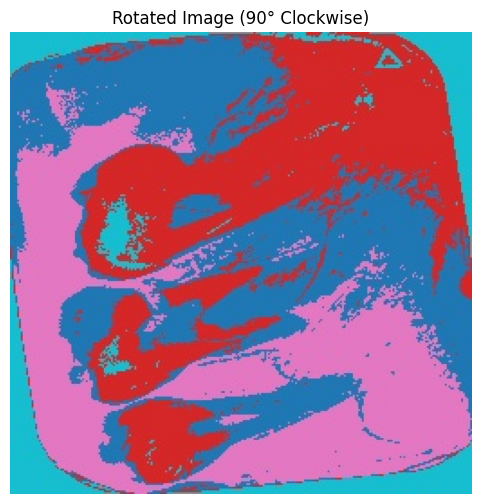

In [32]:
img_rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image (90° Clockwise)")
plt.axis("off")
plt.show()

# 3. Convolution 2D (Conv2D)

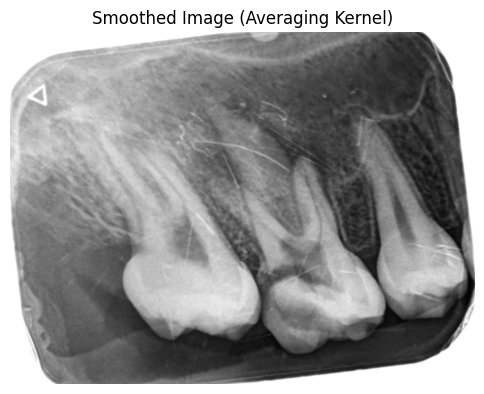

In [33]:
kernel_avg = np.ones((3, 3), np.float32) / 9
img_smoothed = cv2.filter2D(img_gray, -1, kernel_avg)
plt.figure(figsize=(6,6))
plt.imshow(img_smoothed, cmap='gray')
plt.title("Smoothed Image (Averaging Kernel)")
plt.axis("off")
plt.show()

### 3.2. Sharpening Filte

In [ ]:
# A sharpening kernel emphasizes edges by enhancing differences between neighboring pixels.

# %%
kernel_sharp = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]], dtype=np.float32)
img_sharp = cv2.filter2D(img_gray, -1, kernel_sharp)
plt.figure(figsize=(6,6))
plt.imshow(img_sharp, cmap='gray')
plt.title("Sharpened Image")
plt.axis("off")
plt.show()

### 3.3. Custom Convolution with a Sobel-like Kernel

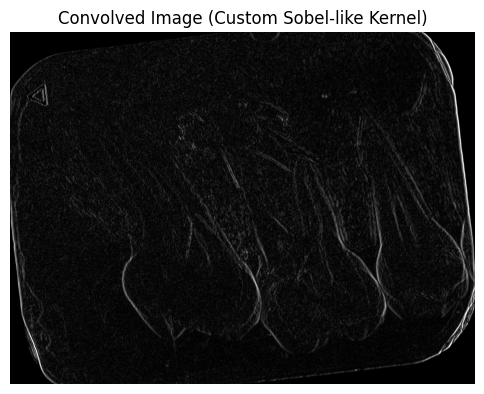

In [34]:
from scipy.signal import convolve2d

# Define a custom vertical edge detector kernel
kernel_custom = np.array([[-1, 0, 1],
                          [-1, 0, 1],
                          [-1, 0, 1]], dtype=np.float32)

img_conv = convolve2d(img_gray, kernel_custom, mode='same', boundary='symm')
img_conv = np.uint8(np.clip(np.abs(img_conv), 0, 255))
plt.figure(figsize=(6,6))
plt.imshow(img_conv, cmap='gray')
plt.title("Convolved Image (Custom Sobel-like Kernel)")
plt.axis("off")
plt.show()

# 4. Edge Detection

### 4.1. Canny Edge Detection

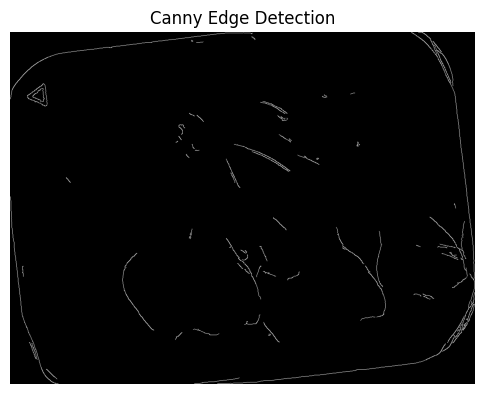

In [35]:
edges_canny = cv2.Canny(img_gray, 100, 200)
plt.figure(figsize=(6,6))
plt.imshow(edges_canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()

### 4.2. Sobel Edge Detection

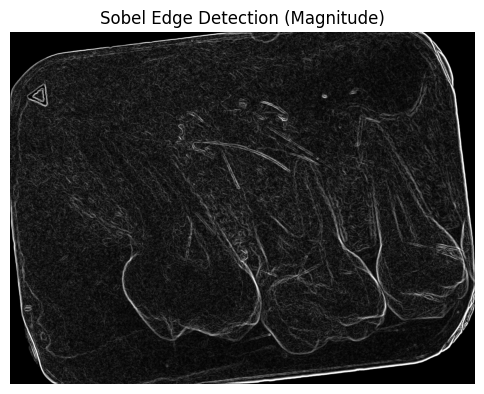

In [36]:
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(np.clip(sobel_magnitude, 0, 255))
plt.figure(figsize=(6,6))
plt.imshow(sobel_magnitude, cmap='gray')
plt.title("Sobel Edge Detection (Magnitude)")
plt.axis("off")
plt.show()

### 4.3. Laplacian Edge Detection

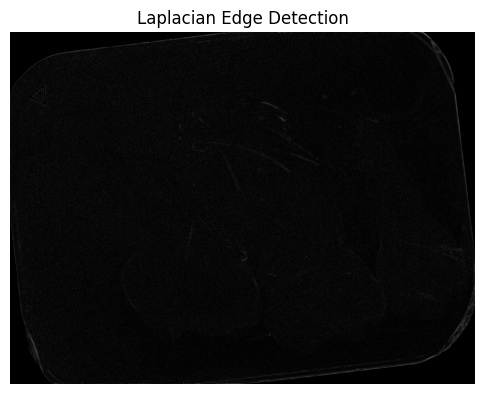

In [37]:
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
laplacian = np.uint8(np.clip(np.abs(laplacian), 0, 255))
plt.figure(figsize=(6,6))
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis("off")
plt.show()

# 5. Image Segmentation

### 5.1. Otsu's Thresholding

Otsu's threshold value: 138.0


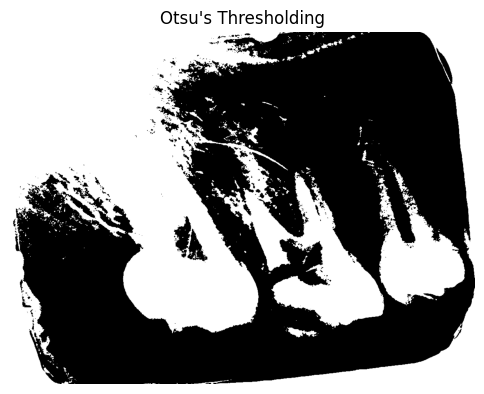

In [38]:
ret, img_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Otsu's threshold value:", ret)
plt.figure(figsize=(6,6))
plt.imshow(img_otsu, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis("off")
plt.show()

### 5.2. Adaptive Thresholding

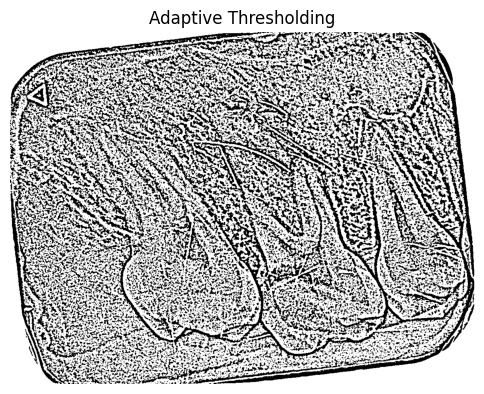

In [39]:
img_adaptive = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY, blockSize=11, C=2)
plt.figure(figsize=(6,6))
plt.imshow(img_adaptive, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis("off")
plt.show()

### 5.3. K-Means Clustering Segmentation

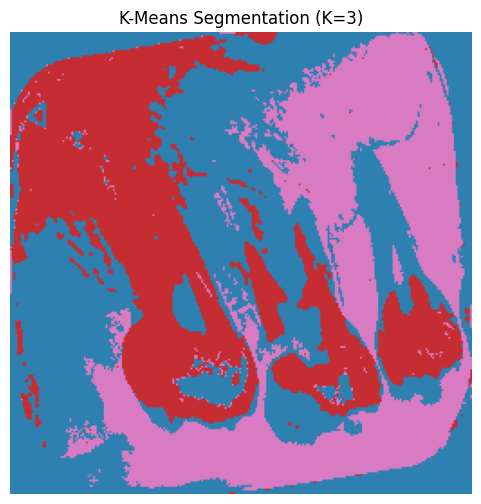

In [40]:
img_data = np.float32(img.reshape((-1, 3)))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3  # Number of clusters
ret, label, center = cv2.kmeans(img_data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
segmented_img = center[label.flatten()].reshape(img.shape)
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
plt.title("K-Means Segmentation (K=3)")
plt.axis("off")
plt.show()

### 5.4. Refinement with Morphological Operations

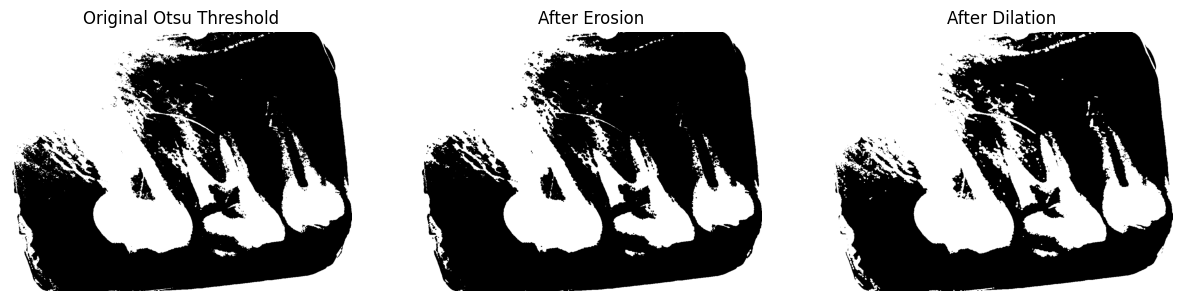

In [41]:
kernel = np.ones((3, 3), np.uint8)
img_eroded = cv2.erode(img_otsu, kernel, iterations=1)
img_dilated = cv2.dilate(img_otsu, kernel, iterations=1)

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(img_otsu, cmap='gray')
plt.title("Original Otsu Threshold")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(img_eroded, cmap='gray')
plt.title("After Erosion")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(img_dilated, cmap='gray')
plt.title("After Dilation")
plt.axis("off")
plt.show()